In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\niyas\python\EDA Project\E-Commerce Analysis - UK\data\interim\cleaned_day2.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [2]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Weekday"] = df["InvoiceDate"].dt.day_name()

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday


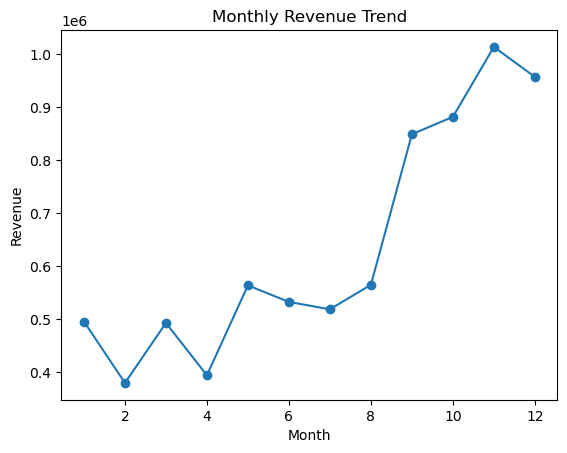

In [3]:
monthly_revenue = df.groupby("Month")["Revenue"].sum()

plt.figure()
monthly_revenue.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.savefig("../reports/figures/monthly_revenue_trend.png")
plt.show()


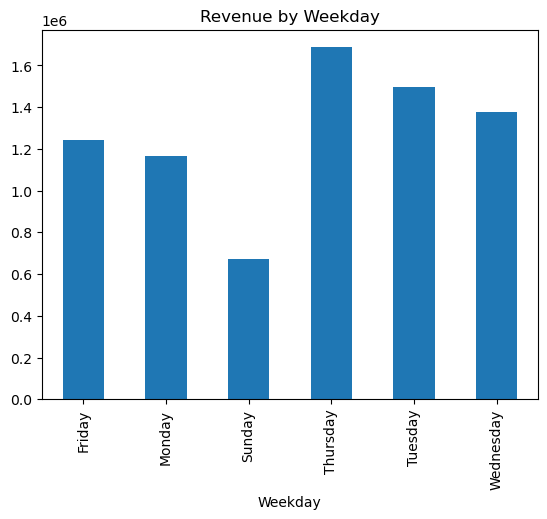

In [4]:
weekday_revenue = df.groupby("Weekday")["Revenue"].sum()

plt.figure()
weekday_revenue.plot(kind="bar")
plt.title("Revenue by Weekday")
plt.savefig("../reports/figures/weekday_revenue.png")
plt.show()


In [5]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df["Quantity"], df["Revenue"])

print("Correlation:", corr)
print("P-value:", p_value)


Correlation: 0.9326691844578874
P-value: 0.0


## Statistical Test Results

Pearson correlation analysis was performed to examine the relationship between Quantity and Revenue.

- The correlation coefficient (0.93) indicates a very strong positive relationship.
- The p-value (0.0) is less than 0.05, confirming that the relationship is statistically significant.
- This means that revenue increases significantly with purchase quantity.
- The result confirms that purchase volume is the primary driver of revenue in the dataset.


In [6]:
df.to_csv("../data/processed/final_cleaned_day4.csv", index=False)


# Final Insights

Based on statistical analysis, time-based exploration, and feature engineering, the following insights were identified:

## Revenue Drivers
- Revenue is strongly driven by purchase quantity.
- Pearson correlation analysis confirms a very strong positive relationship between Quantity and Revenue (0.93).
- Statistical testing shows the relationship is significant (p-value < 0.05).

## Sales Behavior
- Most transactions involve low purchase quantities.
- A small number of bulk purchases contribute significantly to total revenue.
- Sales distribution is highly skewed with several outliers.

## Time-Based Patterns
- Revenue varies across months, indicating possible seasonal trends.
- Sales performance differs across weekdays, showing variation in customer purchasing behavior.

## Feature Engineering Impact
- Extracting time-based features (Year, Month, Day, Weekday) improved analytical understanding.
- Feature engineering helped identify sales patterns and trends.

## Overall Conclusion
- Purchase volume is the primary driver of revenue.
- Business performance can be improved by encouraging bulk purchases and focusing on high-demand periods.
